# Data visualisation in Python

__Prof. Dorien Herremans__


**Open the tutorial in 'File -> Playground mode'. Go through the tutorial first. You will find several `#TODO` slots for you to address. They should be easy if you read through in detail. There are a number of open questions for you to solve as well. **


For a full overview of types of plots using matplotlib, see the gallery [at https://matplotlib.org/2.0.2/gallery.html](https://matplotlib.org/2.0.2/gallery.html)




## Scatterplots

We will be using scottish_hills.csv from [https://github.com/ourcodingclub/CC-python-pandas-matplotlib](https://github.com/ourcodingclub/CC-python-pandas-matplotlib). The file contains all the mountains above 3000 feet (about 914 metres) in Scotland.

We can read this into a variable and see the first 10 lines.

Use the dataframe.head(10) command along with print to have a look into the file.

In [1]:
import pandas as pd

dataframe = pd.read_csv("https://raw.githubusercontent.com/ourcodingclub/CC-python-pandas-matplotlib/master/scottish_hills.csv")


# TODO print out first 10 lines of the file
print(dataframe.head)

<bound method NDFrame.head of                       Hill Name  Height   Latitude  Longitude    Osgrid
0         A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1                 A' Chailleach   997.0  57.693800  -5.128715  NH136714
2                 A' Chailleach   929.2  57.109564  -4.179285  NH681041
3    A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4               A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231
..                          ...     ...        ...        ...       ...
277                  The Saddle  1011.4  57.162395  -5.414721  NG936131
278               Toll Creagach  1054.0  57.309227  -4.999953  NH194282
279                    Tolmount   958.0  56.904725  -3.297929  NO210800
280             Tom a' Choinich  1112.0  57.299518  -5.048959  NH164273
281                  Tom Buidhe   957.0  56.893615  -3.292356  NO213787

[282 rows x 5 columns]>


As explored last week, pandas dataframes can be used for some preliminary data exploration. For instance, let's sort the hills by height:

In [2]:
sorted_hills = dataframe.sort_values(by=['Height'], ascending=False)

# Let's have a look at the top 5 to check
print(sorted_hills.head(5))

                       Hill Name  Height   Latitude  Longitude    Osgrid
92                     Ben Nevis  1344.5  56.796891  -5.003675  NN166712
88   Ben Macdui (Beinn Macduibh)  1309.0  57.070368  -3.669099  NN988989
104                    Braeriach  1296.0  57.078298  -3.728389  NN953999
115                   Cairn Toul  1291.0  57.054397  -3.710773  NN963972
212        Sgor an Lochain Uaine  1258.0  57.058369  -3.725797  NN954976


Now let's load matplotlib. Note: if you are using a jupyter notebook you need the inline statement on line 1 below:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

To save us some time, let's create some shortcut variables, x and y, to register the hight and latitude coordinates of each of the hills.

In [53]:
x = dataframe.Height
y = dataframe.Latitude
z = dataframe.Longitude

Now we are ready to start visualising them. Let's create (and save) a scatterplot. You can use the ` plt.scatter()` command with argument the height and latitude.

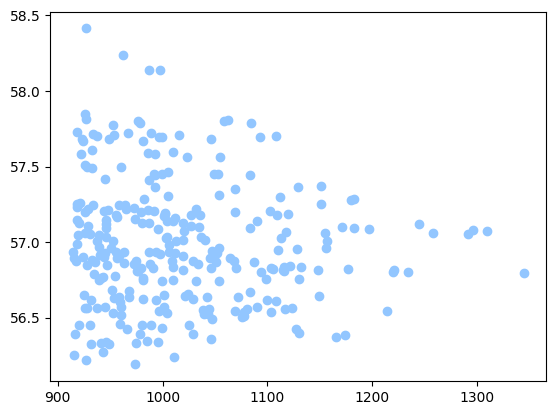

In [54]:
# TODO: create the scatterplot
plt.scatter(x,y)
plt.savefig("scottish_scatter_plot.png")

If you are not using iPython, you can use `plt.show()` to display the plot.

Now let's build upon this graph by adding a linear regression line to it using the `linregress()` command and the same input variables as for scatterplot.

In [55]:
from scipy.stats import linregress
# TODO calculate linear regression
stats = linregress(x,y)

m = stats.slope
b = stats.intercept

Now we can add the plot of our linear regression by using the equation of a straight line.

Add the equation of the linear regression based on the variables and slope/intercept calculated:

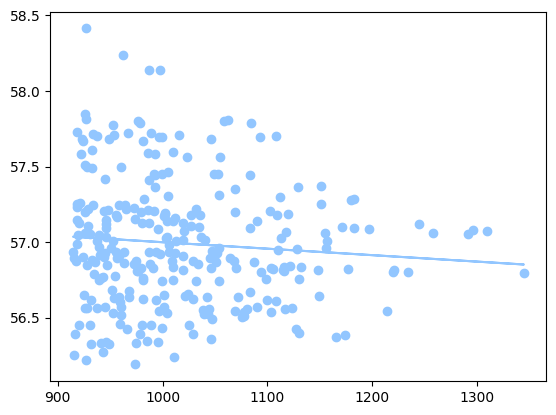

In [56]:
plt.scatter(x, y)
#TODO Add equation of the line, color="red")  # The equation of the straight line.
plt.plot(x, m*x+b)

Note, whether this line is statistically significant can be determined using the extra information in the stats object - `stats.rvalue` and `stats.pvalue`.

In [57]:
print(stats.rvalue)
print(stats.pvalue)

-0.08654281677052679
0.1471793428237369


Now you can make your plot look nicer using arguments such as as fontsize, linewidth, color,...

(array([56. , 56.5, 57. , 57.5, 58. , 58.5, 59. ]),
 [Text(0, 56.0, '56.0'),
  Text(0, 56.5, '56.5'),
  Text(0, 57.0, '57.0'),
  Text(0, 57.5, '57.5'),
  Text(0, 58.0, '58.0'),
  Text(0, 58.5, '58.5'),
  Text(0, 59.0, '59.0')])

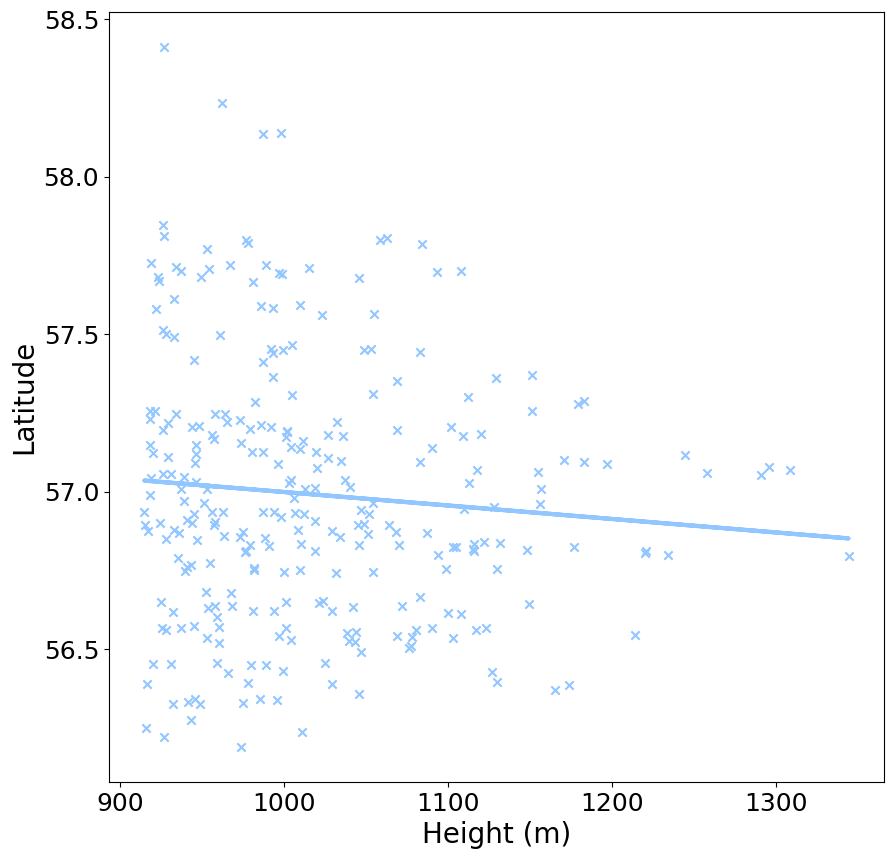

In [58]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
#TODO add the original arguments + an option for linewidth.
plt.plot(x,m*x+b, linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

Let's have a look at how the hills our spread out geographically using latitude (y) and longitude (z). Now we can use s = x to say that the size needs to be equal to the height (x). (I added -900 to make the difference between big and small mountains larger)

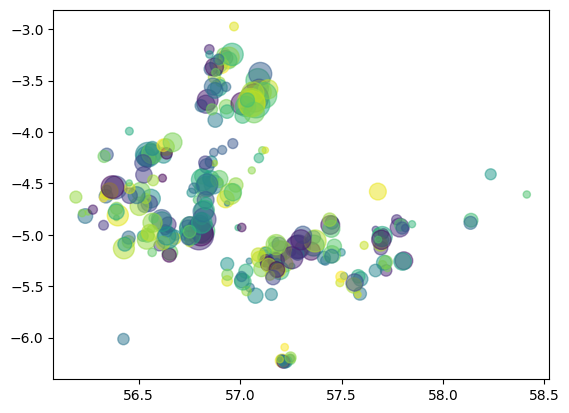

In [59]:
import numpy as np

colors = np.random.rand(len(y))  #generates a different color for each different mountain

plt.scatter(y, z, s = (x-900), c=colors, alpha=0.5)

plt.savefig("colour_dots.png", dpi=25)  # results in 160x120 px image

## Histograms

Let's try some other graphs. A full selection is given at the [matplotlib website](https://matplotlib.org/2.0.2/examples/index.html).

Let's start by looking at the distribution of our hills over the latitude (variable `y` from earlier):

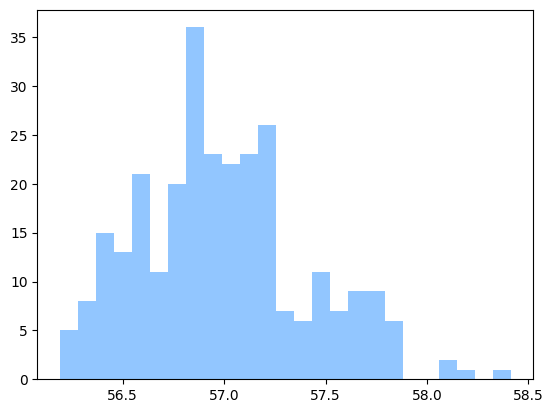

In [60]:
# plt.hist(x, bins=25) #bins separates the latitude in 25 discrete categories.
plt.hist(y, bins=25) #bins separates the latitude in 25 discrete categories.
plt.savefig("histogram.png", dpi=25)  # results in 160x120 px image

Quickly style your plot with stylesheets, full overview [at https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html).

Let's also create a new variable that contains the height of the hills -100m. This to illustrate how to add a second distribution to your graph. In this case, we will make them slightly transparent. Density makes sure the graph normalizes the data.

Add a style to the graph using `plt.style.use()`

<ipython-input-61-85ce4fe27e06>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


Text(0.5, 0, 'Height')

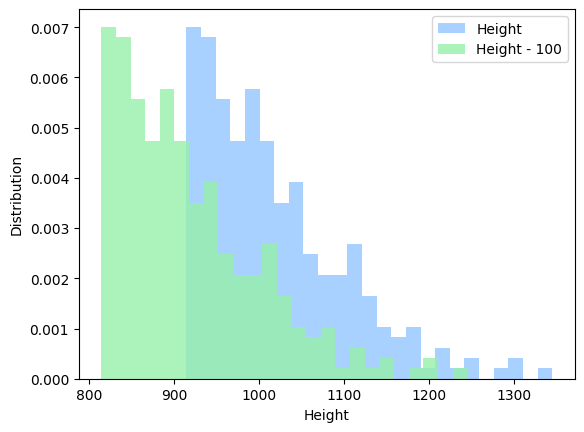

In [61]:
import numpy as np

# using a stylesheet:
# TODO add the style 'seaborn-pastel'
plt.style.use('seaborn-pastel')

#creating the new height variable:
shifted_x = x - 100

fig, ax = plt.subplots() # lets us acces the axis and plot seperately.
ax.hist(x, bins=25, density=True, histtype="stepfilled", alpha=0.8,label='Height')
ax.hist(shifted_x, bins=25, density=True, histtype="stepfilled", alpha=0.8,label='Height - 100')
ax.legend(prop={'size': 10})

ax.set_ylabel('Distribution')
ax.set_xlabel('Height')

## Bar charts

Plot the average $CO_2$ output of both vegetarians and meat eaters for different continents in a bar plot. The data is given below.

Add a legend to the ax using the `legend()` function and set an index value for the rects2 plot.

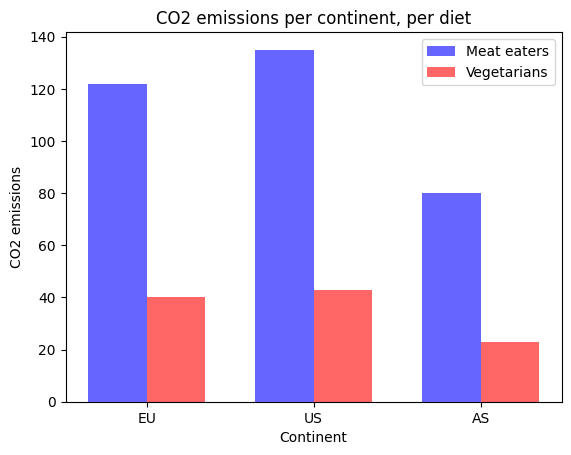

In [62]:
labels = ['EU', 'US', 'AS']

meateaters = [122, 135, 80]
vegetarians = [40, 43, 23]


# Keep a numeric index for the x-axis lables. This will be the positions of the ticks.
index = np.arange(len(labels))


fig, ax = plt.subplots()

# Toy with the below parameters to change the appearance of your graph:
bar_width = 0.35
opacity = 0.6

rects1 = ax.bar(index, meateaters, bar_width,
                alpha=opacity, color='b',
                label='Meat eaters')

# Note, shift the x position also with the bar width so that the bar appears next to the previous one±
#TODO set an index which is shifted by the bar_width so that it's not entirely overlapping
rects2 = ax.bar(index+bar_width,
                vegetarians, bar_width,
                alpha=opacity, color='r',
                label='Vegetarians')


ax.set_xlabel('Continent')
ax.set_ylabel('CO2 emissions')
ax.set_title('CO2 emissions per continent, per diet')

ax.set_xticks(index + bar_width / 2)

ax.set_xticklabels(labels)

#TODO add legend
ax.legend(prop={'size': 10})

## Line plots

Let's move on to another type of graph: a simple line plot, but using two vertical axis.

We will create a function to calculate the temperature in celcius given Fahrenheit. Add the function to calculate Calcius from the Fahrenheit `temp`.

In [31]:
def fahrenheit2celsius(temp):
    """
    Returns temperature in Celsius.
    """
    #TODO return the formula for getting Celcius from Fahrenheit
    # example: (32°F − 32) × 5/9 = 0°C
    return (temp-32) * 5/9


# TEMPURATURE AT EACH HOUR THROUGHOUT THE DAY (In Fahrenheit)
temperature = [100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108, 100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108]



We will use `twinx` to get a second set of axes. This allows us to plot the temperature evolution throughout the day using both C and F.

Text(0.5, 23.52222222222222, 'Time (hour of day)')

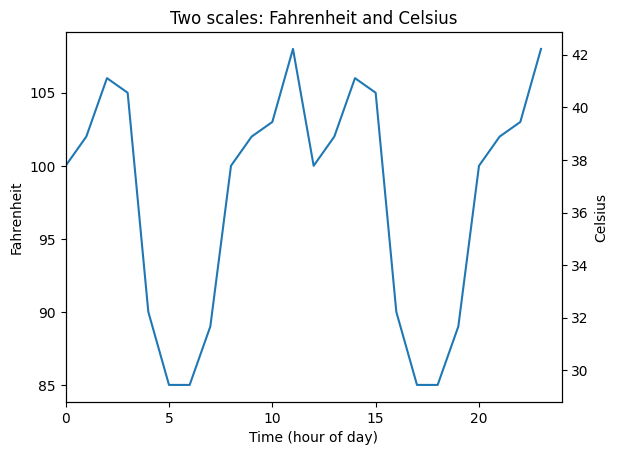

In [32]:
fig, ax_f = plt.subplots()
ax_c = ax_f.twinx()

#plot our data:
ax_f.plot(temperature)
ax_f.set_xlim(0, 24) #x-axis shows 24 hours

# set the axis limits:
y1, y2 = ax_f.get_ylim()
ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
ax_c.figure.canvas.draw()

# change some axis labels
ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')
ax_f.set_xlabel('Time (hour of day)')


Suppose we have a sinusoidal plot (formula line 2 below), and we want to fill it. First let's plot the sinusoid.

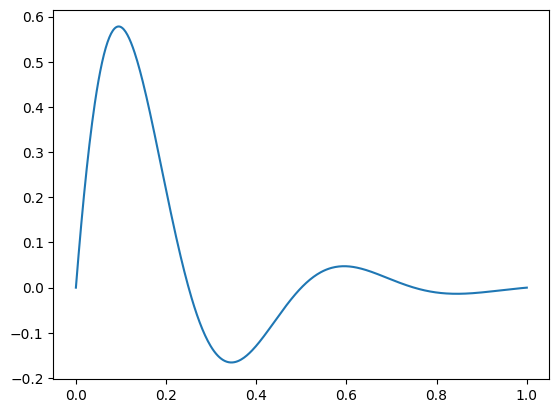

In [33]:
newx = np.linspace(0, 1, 500) # sample 500 X's linearly between 0 and 1
newy = np.sin(4 * np.pi * newx) * np.exp(-5 * newx) #formula for our sinusoidal graph

fig, ax = plt.subplots()  #plt.subplots()  lets us access the axis and plot seperately.

ax.plot(newx, newy)

Then we can easily use the `fill()` command of ax to 'fill' the axes with the newly sampled data.

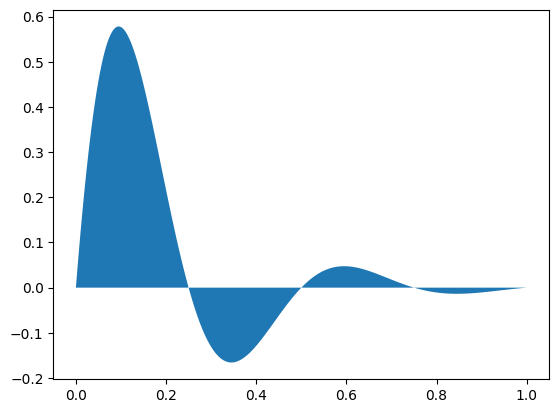

In [34]:
fig, ax = plt.subplots()

#TODO fill the plot with the newly sampled data newx and newy
plt.fill(newx, newy)

Axis labels can influence how we perceive the data. Let's have a look at this stock data.

Text(0, 0.5, 'Stock A price')

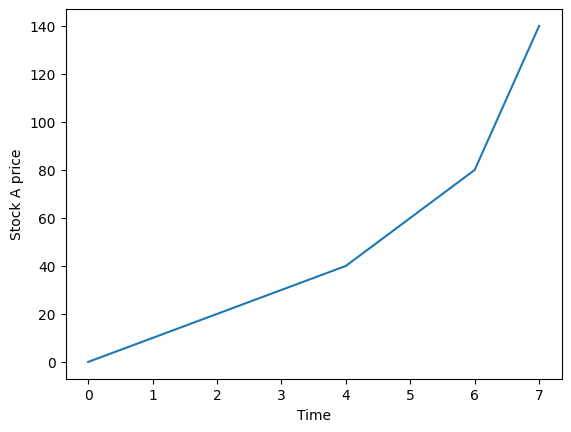

In [36]:
# growth of stock A
stockA = [0, 10, 20, 30, 40, 60, 80, 140]

plt.plot(stockA)
# plt.ylim(bottom=0, top = 110)
plt.xlabel('Time')
plt.ylabel('Stock A price')

Now let's change to a logaritmic axis. Other options here are `linear, log, logit, symlog`. I consolidated the code of the previous plot and put it below. Give it a try.  



```
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(stockA)
ax.set_yscale('log') #change the scale here

plt.xlabel('Time')
plt.ylabel('Stock A price')
ax.set_title('Logarithmic')
```



Text(0.5, 1.0, 'Logarithmic')

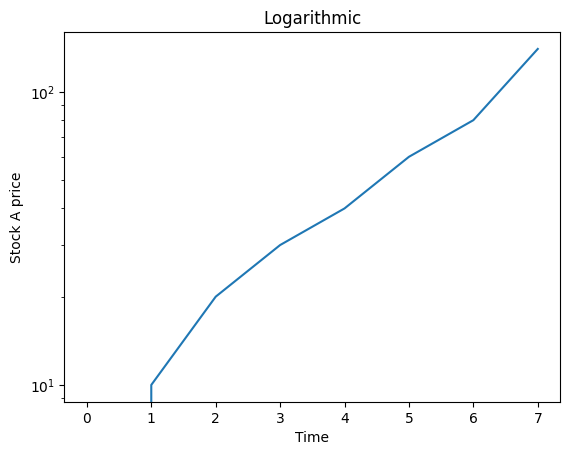

In [45]:
# TODO try different axes scales
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(stockA)
ax.set_yscale('log') #change the scale here

plt.xlabel('Time')
plt.ylabel('Stock A price')
ax.set_title('Logarithmic')


This illustrates how axes can deform the data...

### Boxplots

For all the mountains, let's see what their average height is, with standard deviation in a boxplot.



{'whiskers': [<matplotlib.lines.Line2D at 0x7b185e954d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7b185e9552a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b185e954ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b185e9557e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b185e955a80>],
 'means': []}

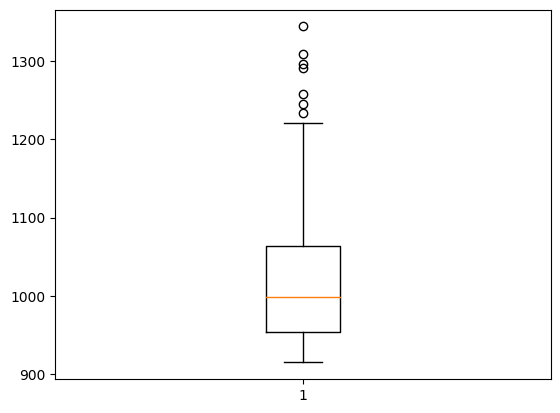

In [46]:
plt.boxplot(x)

Easy enough. Now we can make this slightly nicer:

{'whiskers': [<matplotlib.lines.Line2D at 0x7b185e76ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x7b185e76ce80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b185e76c7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b185e76d3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b185e76d660>],
 'means': []}

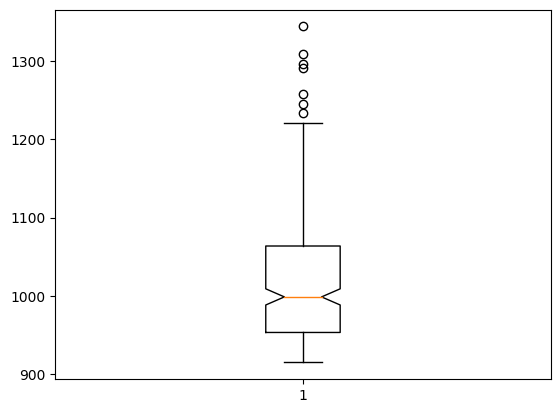

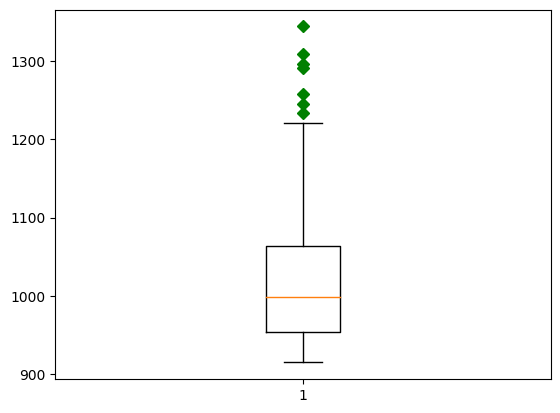

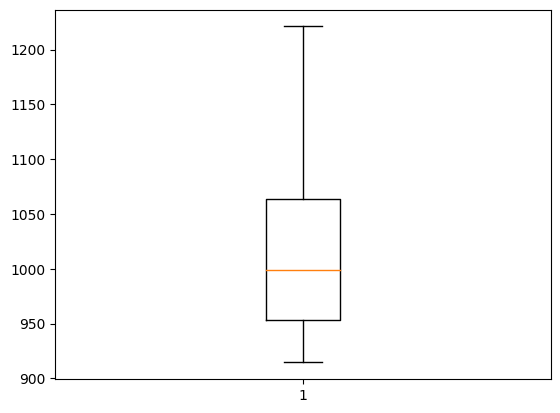

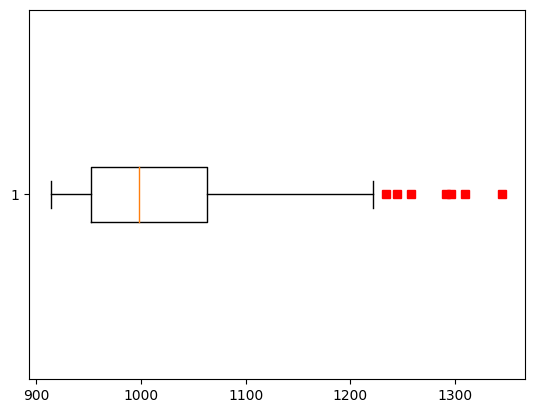

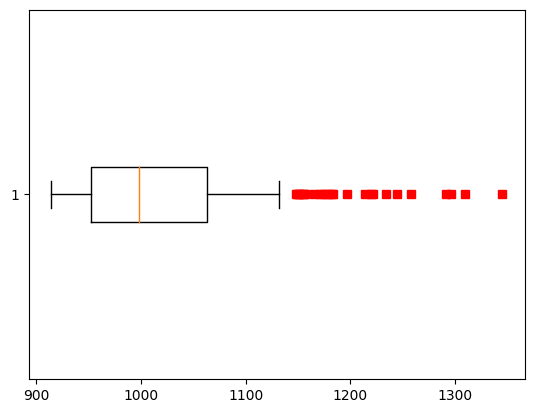

In [47]:
# notched plot
plt.figure()
plt.boxplot(x, 1)

# change outlier point symbols
plt.figure()
plt.boxplot(x, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(x, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(x, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(x, 0, 'rs', 0, 0.75)

# Now to try yourself (Exercises):

Load the dataset from `https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv`, and have a look at what it contains.

Then create the following:

1. A __histogram__ of the salaries for women.
2. Add the men's salaries to this histogram.
3. Give your histogram a dark background and label the axes.
4. Next, please label the colors of the histogram so we know who is what (men vs women).
5. Instead of a histogram, create a __bar chart__ that lists the salary for women (y-axis) for each school.
6. Also add men to this bar chart.
7. Make the style nice and add labels.
8. Now create a nice __boxplot__ of the data, one for men, one for women (two box's same graph).

In [63]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")


# TODO print out first 10 lines of the file
print(df.head)

<bound method NDFrame.head of         School  Women  Men  Gap
0          MIT     94  152   58
1     Stanford     96  151   55
2      Harvard    112  165   53
3       U.Penn     92  141   49
4    Princeton     90  137   47
5      Chicago     78  118   40
6   Georgetown     94  131   37
7        Tufts     76  112   36
8         Yale     79  114   35
9     Columbia     86  119   33
10        Duke     93  124   31
11   Dartmouth     84  114   30
12         NYU     67   94   27
13  Notre Dame     73  100   27
14     Cornell     80  107   27
15    Michigan     62   84   22
16       Brown     72   92   20
17    Berkeley     71   88   17
18       Emory     68   82   14
19        UCLA     64   78   14
20       SoCal     72   81    9>


In [81]:
x = df.Women
y = df.Men

## Solution: histogram

(array([1., 1., 1., 1., 1., 3., 0., 1., 2., 1., 0., 1., 1., 0., 1., 2., 2.,
        1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 62.,  64.,  66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,
         84.,  86.,  88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104.,
        106., 108., 110., 112.]),
 <BarContainer object of 25 artists>)

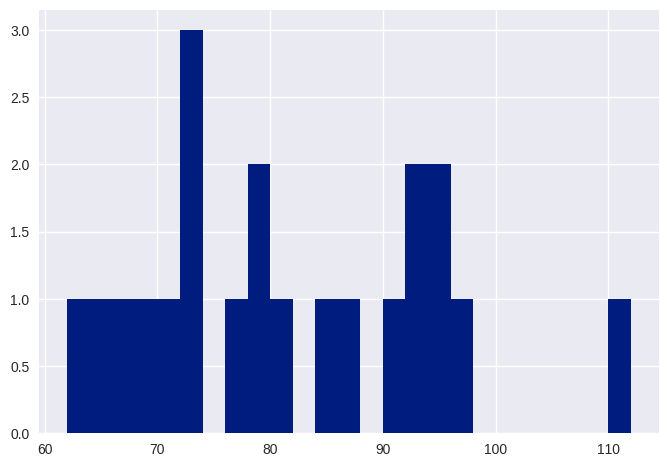

In [82]:
#1. A histogram of the salaries for women.
plt.hist(x, bins=25) #bins separates the latitude in 25 discrete categories.

<ipython-input-83-e4787a9372bd>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0.5, 0, 'Salary')

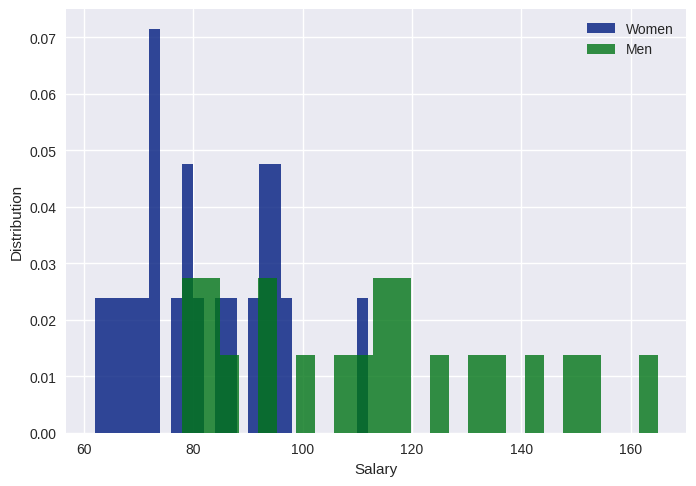

In [83]:
#2. Add the men's salaries to this histogram.
#3. Give your histogram a dark background and label the axes.
#4. Next, please label the colors of the histogram so we know who is what (men vs women).
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots() # lets us access the axis and plot seperately.
ax.hist(x, bins=25, density=True, histtype="stepfilled", alpha=0.8,label='Women')
ax.hist(y, bins=25, density=True, histtype="stepfilled", alpha=0.8,label='Men')

ax.legend(prop={'size': 10})
ax.set_ylabel('Distribution')
ax.set_xlabel('Salary')

## Solution: Bar chart

In [84]:
x = df.School
y = df.Women
z = df.Men

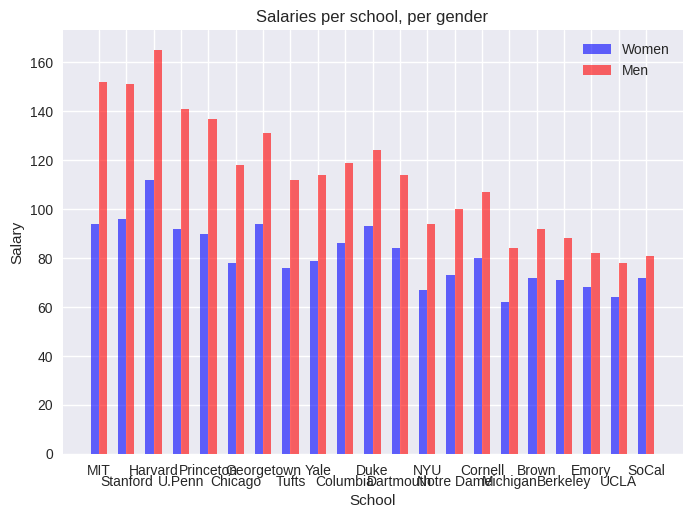

In [89]:
# create a bar chart that lists the salary for women (y-axis) for each school.
# Also add men to this bar chart.
# Make the style nice and add labels.


# Keep a numeric index for the x-axis lables. This will be the positions of the ticks.
index = np.arange(len(x))

fig, ax = plt.subplots()

# Toy with the below parameters to change the appearance of your graph:
bar_width = 0.3
opacity = 0.6

rects_women = ax.bar(index, y, bar_width,
                alpha=opacity, color='b',
                label='Women')

# Note, shift the x position also with the bar width so that the bar appears next to the previous one±
rects_women = ax.bar(index+bar_width,
                z, bar_width,
                alpha=opacity, color='r',
                label='Men')


ax.set_xlabel('School')
ax.set_ylabel('Salary')
ax.set_title('Salaries per school, per gender')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(x)
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)

#TODO add legend
ax.legend(prop={'size': 10})

## Solution: Boxplot

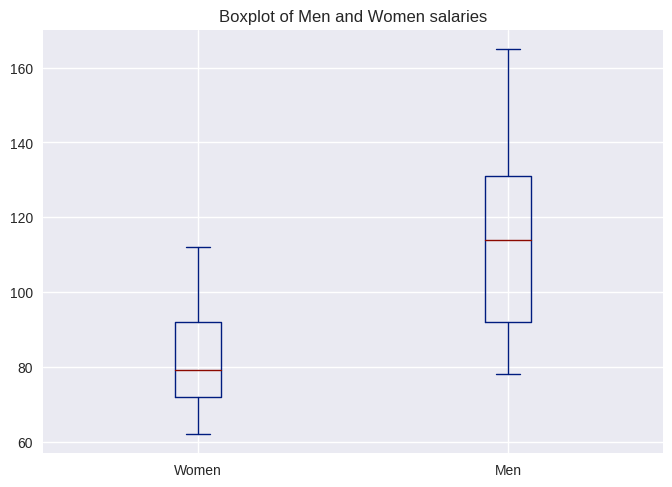

In [107]:
# Now create a nice boxplot of the data, one for men, one for women (two box's same graph).
ax = df[['Women','Men']].plot(kind='box', title='Boxplot of Men and Women salaries')

Well done!

## Interactive fun

There are a lot of libraries available to make plots more dynamic, for instance: https://mode.com/blog/python-interactive-plot-libraries/

Let's experiment a bit with Ploly: https://plotly.com/python/

In [108]:
import plotly.graph_objects as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

fig = go.Figure(data=go.Surface(z=z_data, showscale=False))
fig.update_layout(
    title='Mt Bruno Elevation',
    width=400, height=400,
    margin=dict(t=40, r=0, l=20, b=20)
)

name = 'default'
# Default parameters which are used when `layout.scene.camera` is not provided
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.25, y=1.25, z=1.25)
)

fig.update_layout(scene_camera=camera, title=name)
fig.show()

Move the plot around to see how it's interactive. Check out many more of the solutions on the plotly demo site

## Exercise:

* Take the scatterplot from the scottish hills before, but now, visualize the height of the point you are hoovering over dynamically. You can use the template from https://plotly.com/python/click-events/

Be sure to end with `f.show()`

In [132]:
# Read data from a csv
dataframe = pd.read_csv('https://raw.githubusercontent.com/ourcodingclub/CC-python-pandas-matplotlib/master/scottish_hills.csv')

z = dataframe.Height
x = dataframe.Latitude
y = dataframe.Longitude

fig = go.Figure(data=go.Scatter(x = x, y = y,
                                mode='markers'))
scatter = fig.data[0]
colors = ['#a3a7e4'] * 100
scatter.marker.color = colors
scatter.marker.size = [10] * 100
fig.layout.hovermode = 'closest'

def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        c[i] = '#bae2be'
        s[i] = z[i]
        with fig.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s


scatter.on_click(update_point)
fig.show()

## Fun with maps
Now we can take the same data and plat them on a map using the very useful map library: Mapbox. Lots of info here: https://plotly.com/python/mapbox-layers/

Using the (free) open street maps, we can very easily display nice maps with overlays.

In [133]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

print(us_cities.head())

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

         City           State  Population        lat         lon
0  Marysville      Washington       63269  48.051764 -122.177082
1      Perris      California       72326  33.782519 -117.228648
2   Cleveland            Ohio      390113  41.499320  -81.694361
3   Worcester   Massachusetts      182544  42.262593  -71.802293
4    Columbia  South Carolina      133358  34.000710  -81.034814


### Exercise

Now use the same technique to display the Scottish Hills yet again with a hooverable height over the map.

In [134]:
import pandas as pd
sc_hills = pd.read_csv("https://raw.githubusercontent.com/ourcodingclub/CC-python-pandas-matplotlib/master/scottish_hills.csv")

print(sc_hills.head())

import plotly.express as px

fig = px.scatter_mapbox(sc_hills, lat="Latitude", lon="Longitude", hover_name="Hill Name", hover_data=["Height"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

                    Hill Name  Height   Latitude  Longitude    Osgrid
0       A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1               A' Chailleach   997.0  57.693800  -5.128715  NH136714
2               A' Chailleach   929.2  57.109564  -4.179285  NH681041
3  A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4             A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231


## Extra video - tableau:

A great tool for data visualisation (and management) is Tableau. We won't be seeing this is detail as this is not a big data or database course, but for those of you interested here is a very quick intro:

https://youtu.be/7Jl-RwkzqQ4?t=327


In [135]:
# play video in Colab:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/7Jl-RwkzqQ4?t=327" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning:

Consider using IPython.display.IFrame instead



You can take it one step further and watch this demo on how to make a covid dashboard with Tableau: https://www.youtube.com/watch?v=mvpGTXRLIQc

In [140]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/watch?v=mvpGTXRLIQc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')